In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
test_data_path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/test_data/1024test/all_data.csv'
df = pd.read_csv(path)

df_test = pd.read_csv(test_data_path)
# df.add(df_test, fill_value=0)

X_train = np.array([df['x'], df['y']]).T
y_train_o = np.array(df['z'])

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train_o, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2

X_train_x = np.array(df['x'])
X_train_y = np.array(df['y'])

X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_train_x,y_train_o, test_size=0.2, random_state=0)

X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X_train_y,y_train_o, test_size=0.2, random_state=0)


<Axes: xlabel='y', ylabel='z'>

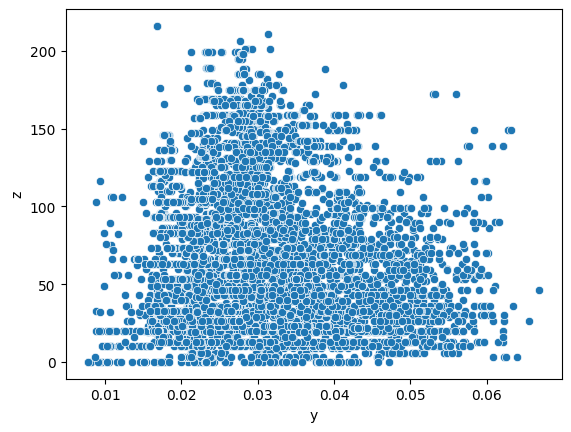

In [48]:
import seaborn as sns
# display the connection between x and z, y and z
sns.scatterplot(x=df['y'], y=df['z'])

[GBR x and y] test on train dataset
mse:  1393.1752877810986
rmse:  37.325263398683454
mae:  28.59127824079814
r2:  0.5663487324832278
[GBR x and y] test on test dataset
mse:  1589.6837220171046
rmse:  39.87083798990315
mae:  30.697250968820907
r2:  0.5042426119286723


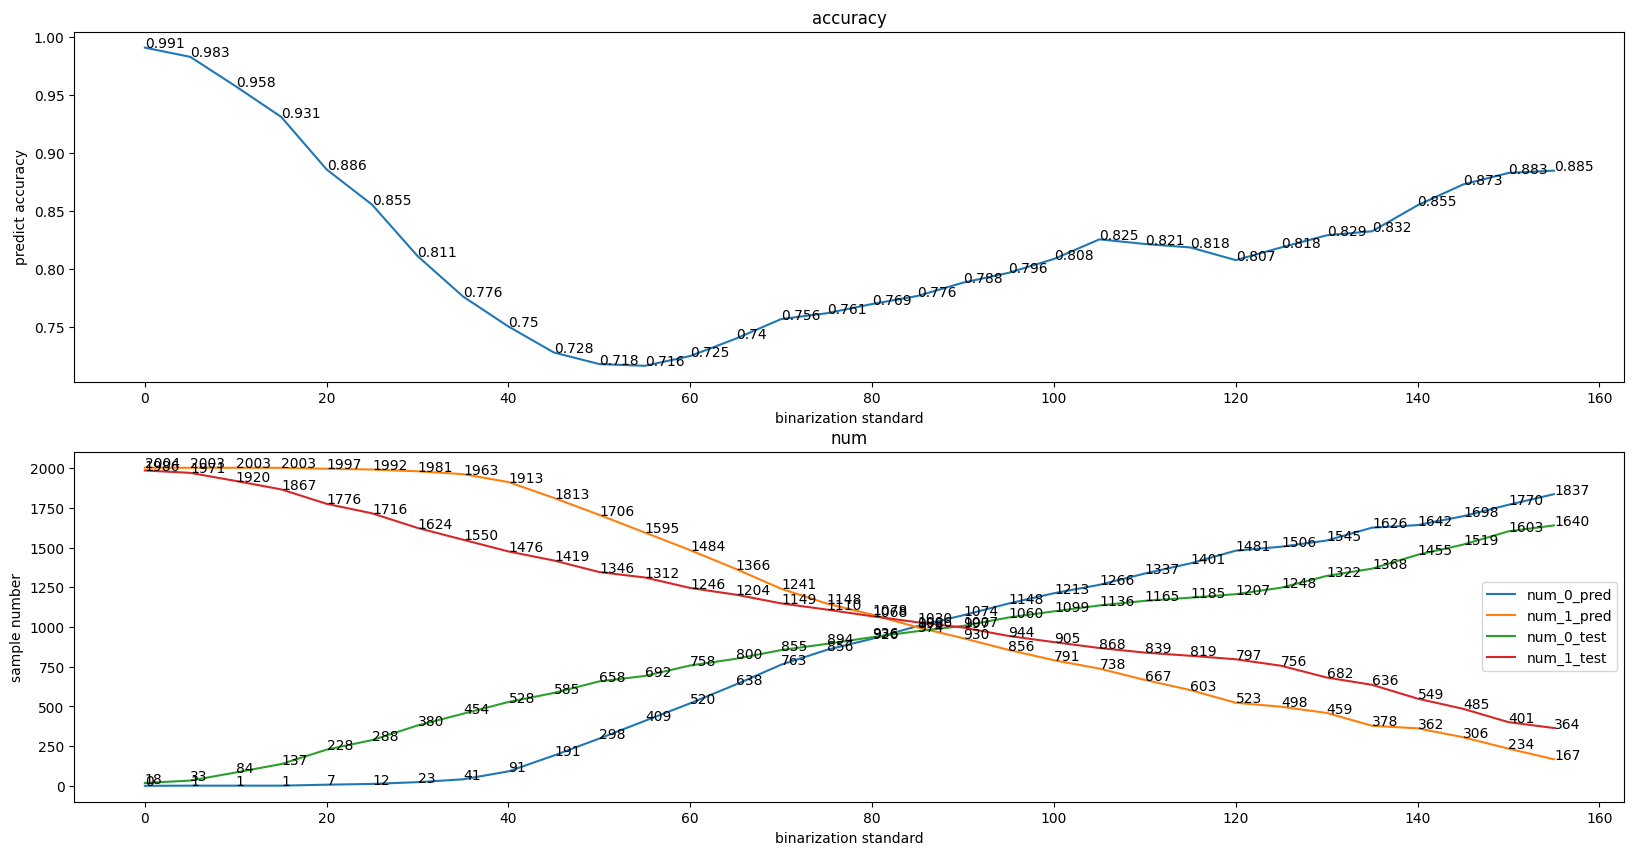

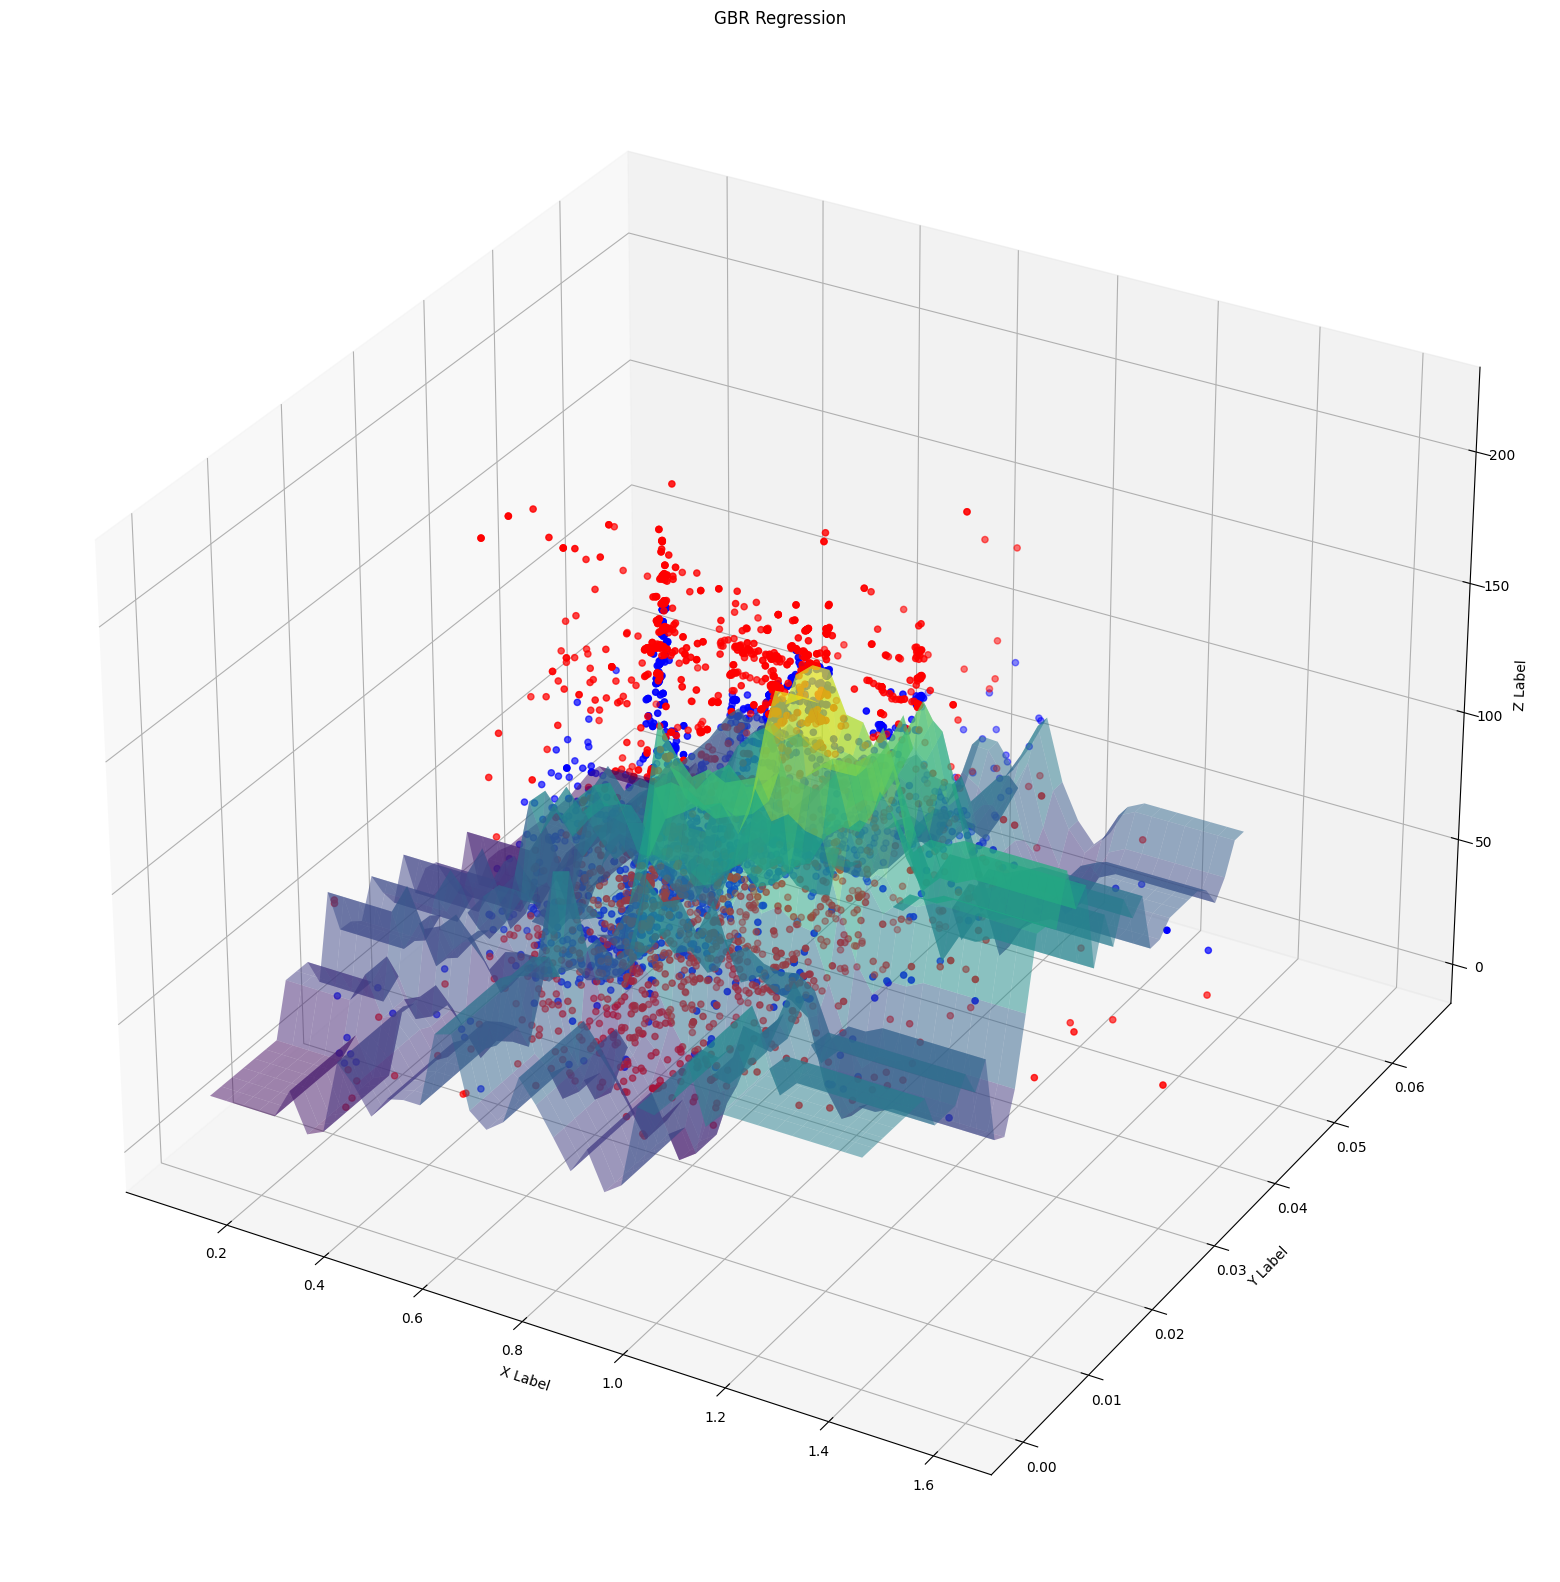

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
def z_standrand_scaler( y_pred, y_test):
    # make a table to show the accuracy, number of 0 and 1 in y_pred and y_test
    accuracys = []
    num_0_pred = []
    num_1_pred = []
    num_0_test = []
    num_1_test = []
    per = np.arange(0, 160, 5)
    for standard in per:
        y_pred2 = y_pred.copy()
        y_test2 = y_test.copy()
        y_pred2[y_pred2 <= standard] = 0
        y_pred2[y_pred2 > standard] = 1
        y_test2[y_test2 <= standard] = 0
        y_test2[y_test2 > standard] = 1
        accuracy = np.sum(y_pred2 == y_test2) / len(y_test2)
        accuracys.append(accuracy)
        num_0_pred.append(np.sum(y_pred2 == 0))
        num_1_pred.append(np.sum(y_pred2 == 1))
        num_0_test.append(np.sum(y_test2 == 0))
        num_1_test.append(np.sum(y_test2 == 1))

    # data = {'standard': per, 'accuracy': accuracys, 'num_0_pred': num_0_pred, 'num_1_pred': num_1_pred, 'num_0_test': num_0_test, 'num_1_test': num_1_test}
    # df = pd.DataFrame(data)
    # df = df[['standard', 'accuracy', 'num_0_pred', 'num_0_test', 'num_1_pred','num_1_test']]
    # print(df)

    # draw the accuracy curve
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    plt.plot(per, accuracys)
    plt.title('accuracy')
    plt.xlabel('binarization standard')
    plt.ylabel('predict accuracy')
    for i in range(len(per)):
        plt.text(per[i], accuracys[i], str(round(accuracys[i], 3)))

    plt.subplot(2,1,2)
    # draw 0 and 1 in one figure
    plt.plot(per, num_0_pred, label='num_0_pred')
    plt.plot(per, num_1_pred, label='num_1_pred')
    plt.plot(per, num_0_test, label='num_0_test')
    plt.plot(per, num_1_test, label='num_1_test')
    plt.xlabel('binarization standard')
    plt.ylabel('sample number')
    # text the accuracy of each point
    for i in range(len(per)):
        # plt.text(per[i], num_1_pred[i], str(round(accuracys[i], 3)))
        plt.text(per[i], num_0_pred[i], str(round(num_0_pred[i], 3)))
        plt.text(per[i], num_1_pred[i], str(round(num_1_pred[i], 3)))
        plt.text(per[i], num_0_test[i], str(round(num_0_test[i], 3)))
        plt.text(per[i], num_1_test[i], str(round(num_1_test[i], 3)))

    plt.legend()
    plt.title('num')
    plt.show()

    return

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2


def test_on_local(filp,use):
    # path = '/home/ghosnp/dataset/self_l1/all_data.csv'
    path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
    df = pd.read_csv(path)
    X_train = np.array([df['x'],df['y']]).T
    y_train = np.array(df['z'])

    if use:
        index = np.where(y_train > filp)
        X_train = np.concatenate((X_train, X_train[index]), axis=0)
        y_train = np.concatenate((y_train, y_train[index]), axis=0)

        index = np.where(y_train > 160)
        X_train = np.concatenate((X_train, X_train[index]), axis=0)
        y_train = np.concatenate((y_train, y_train[index]), axis=0)


    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

    gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
    gbr.fit(X_train,y_train)
    y_pred = gbr.predict(X_train)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_train, y_pred)
    print('[GBR x and y] test on train dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    y_pred = gbr.predict(X_test)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
    print('[GBR x and y] test on test dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    z_standrand_scaler(y_pred, y_test)

    # vis the test data and curve in 3D

    #生成网格点
    X, Y = np.meshgrid(np.linspace(0.1, 1.4, 40), np.linspace(0, 0.06, 40))
    # X, Y = np.meshgrid(np.linspace(-1.1, 1.1, 30), np.linspace(-4.0, -1.9, 30))
    Z = gbr.predict(np.column_stack((X.ravel(), Y.ravel())))
    Z = Z.reshape(X.shape)
    # Z[Z <= 0] = np.nan
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')

    # ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', marker='o')
    ax.scatter(X_test[:,0], X_test[:,1], y_test, c='r', marker='o')
    ax.scatter(X_test[:,0], X_test[:,1], y_pred, c='b', marker='o')
 
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('GBR Regression')
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.5)
    plt.show()

    return gbr

gbr = test_on_local(120, True)

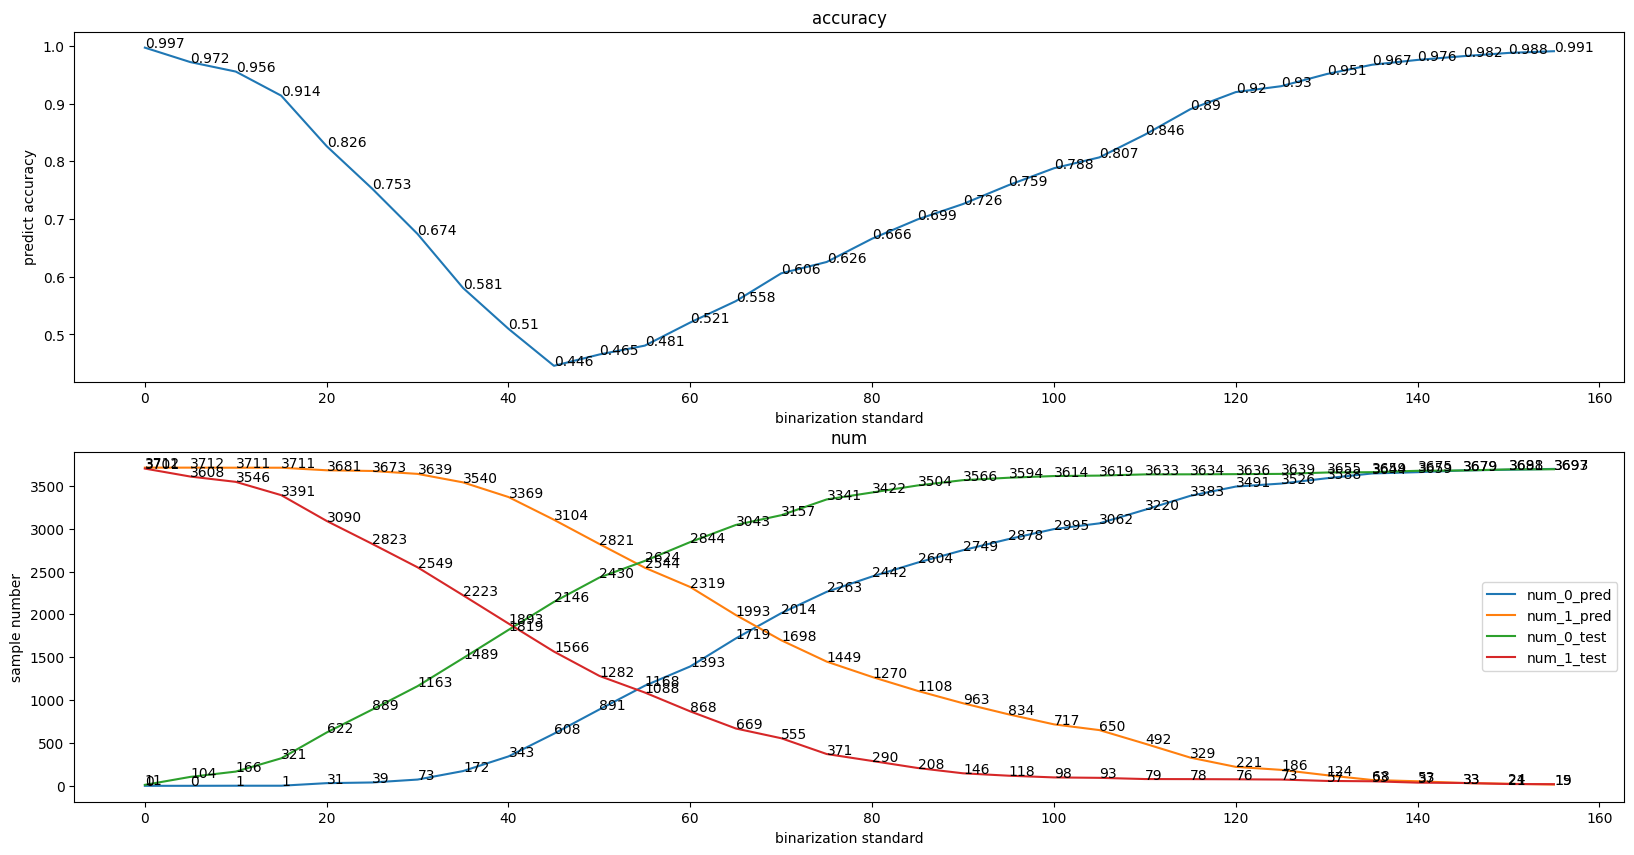

In [50]:
test_data_path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/test_data/1024test/all_data.csv'

test_df = pd.read_csv(test_data_path)
X_test = np.array([test_df['x'],test_df['y']]).T
y_test = np.array(test_df['z'])

y_pred = gbr.predict(X_test)
z_standrand_scaler(y_pred, y_test)

